In [2]:
from utils import *
import numpy as np

# Parsing

In [3]:
with open("data/input24.txt") as f:
    data = f.read().rstrip("\n")

def get_grid(inlines, c2num):
    mat = np.array([[c for c in l] for l in inlines.split("\n")])
    matnum = np.zeros(mat.shape)
    for c in np.unique(mat):
        matnum[mat==c] = c2num[c]
    return matnum, mat

c2num = {".": 0, "#": 1, ">": 2, "v": 3, "O": 4}
num2c = {v: k for k, v in c2num.items()}

class Stone:
    def __init__(self, pos, vel, means) -> None:
        self.p1 = np.array(pos) - means
        self.v = np.array(vel)
        self.p2 = self.p1 + self.v*1e11

def parse(inlines):
    posv = [(ints(l.split("@")[0]), ints(l.split("@")[1])) for l in inlines.split("\n")]
    means = np.array([np.mean([pv[0][0] for pv in posv]), np.mean([pv[0][1] for pv in posv]), np.mean([pv[0][2] for pv in posv])])
    stones = [Stone(l[0], l[1], means) for l in posv]
    return stones, [l for l in inlines.split("\n")], means

stones, ls, means = parse(data)

# Part 1

In [4]:
def line2d(p1, p2):
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

def intersection2d(L1, L2, tareax, tareay, p1, p2, v1, v2):
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        if tareax[0]<=x<=tareax[1] and tareay[0]<=y<=tareay[1] and not ((x-p1[0])*v1[0]<0 or (y-p1[1])*v1[1]<0 or (x-p2[0])*v2[0]<0 or (y-p2[1])*v2[1]<0):
            t1 = np.sqrt((x-p1[0])**2 + (y-p1[1])**2)/np.sqrt(v1[0]**2 + v1[1]**2)
            t2 = np.sqrt((x-p2[0])**2 + (y-p2[1])**2)/np.sqrt(v2[0]**2 + v2[1]**2)
            return x,y,t1,t2

    return False

tareax = (200000000000000-means[0],400000000000000-means[0])
tareay = (200000000000000-means[1],400000000000000-means[1])

nstones = len(stones)
accum = 0
found = []
xs = []
ys = []
for i in range(nstones):
    for j in range(i+1, nstones):
        pint = intersection2d(line2d(stones[i].p1, stones[i].p2), line2d(stones[j].p1, stones[j].p2), tareax, tareay, stones[i].p1, stones[j].p1, stones[i].v, stones[j].v)
        if pint:
            x,y,t1,t2 = pint
            accum += 1
            xs.append(x)
            ys.append(y)
            found.append((i,j,max(t1,t2), x+means[0], y+means[1]))
print(accum)

16727


# Part 2

pr+ti*vr=pi+ti*vi

->
pr-pi=ti(vi-vr)
RS and LS parallel

->
(pr-pi)x(vi-vr)=0

->
pr1-pi1  pr2-pi2  pr3-pi3
vi1-vr1  vi2-vr2  vi3-vr3

->
(pr_2-pi_2)*(vi_3-vr_3) - (pr_3-pi_3)*(vi_2-vr_2) = 0
(pr_3-pi_3)*(vi_1-vr_1) - (pr_1-pi_1)*(vi_3-vr_3) = 0
(pr_1-pi_1)*(vi_2-vr_2) - (pr_2-pi_2)*(vi_1-vr_1) = 0

->
pr_2*va_3 - pr_2*vr3 - pa_2*va_3 + pa_2*vr_3 - pr_3*va_2 + pr_3*vr_2 + pa_3*va_2 - pa_3*vr_2 = 0
pr_2*vb_3 - pr_2*vr3 - pb_2*vb_3 + pb_2*vr_3 - pr_3*vb_2 + pr_3*vr_2 + pb_3*vb_2 - pb_3*vr_2 = 0 -

__
pr_2*(va_3-vb_3) + vr_3*(pa_2-pb_2) - pr_3*(va_2-vb_2) - vr_2*(pa_3-pb_3) = pa_3*va_2 - pb_3*vb_2 - pa_2*va_3 + pb_2*vb_3

and so on...

In [5]:
pa = stones[0].p1
pb = stones[1].p1
pc = stones[2].p1
va = stones[0].v
vb = stones[1].v
vc = stones[2].v

A = np.array([
    [0,va[2]-vb[2],vb[1]-va[1],0,pb[2]-pa[2],pa[1]-pb[1]],
    [0,va[2]-vc[2],vc[1]-va[1],0,pc[2]-pa[2],pa[1]-pc[1]],

    [va[2]-vb[2],0,vb[0]-va[0],pb[2]-pa[2],0,pa[0]-pb[0]],
    [va[2]-vc[2],0,vc[0]-va[0],pc[2]-pa[2],0,pa[0]-pc[0]],

    [va[1]-vb[1],vb[0]-va[0],0,pb[1]-pa[1],pa[0]-pb[0],0],
    [va[1]-vc[1],vc[0]-va[0],0,pc[1]-pa[1],pa[0]-pc[0],0],
])
y = -np.array([
    pa[2]*va[1] - pb[2]*vb[1] - pa[1]*va[2] + pb[1]*vb[2],
    pa[2]*va[1] - pc[2]*vc[1] - pa[1]*va[2] + pc[1]*vc[2],

    pa[2]*va[0] - pb[2]*vb[0] - pa[0]*va[2] + pb[0]*vb[2],
    pa[2]*va[0] - pc[2]*vc[0] - pa[0]*va[2] + pc[0]*vc[2],

    pa[1]*va[0] - pb[1]*vb[0] - pa[0]*va[1] + pb[0]*vb[1],
    pa[1]*va[0] - pc[1]*vc[0] - pa[0]*va[1] + pc[0]*vc[1],
])
x = np.linalg.solve(A, y)
pr = x[:3]
vr = x[3:]
print(int((pr+means).sum()))

606772018765659


# Overkill

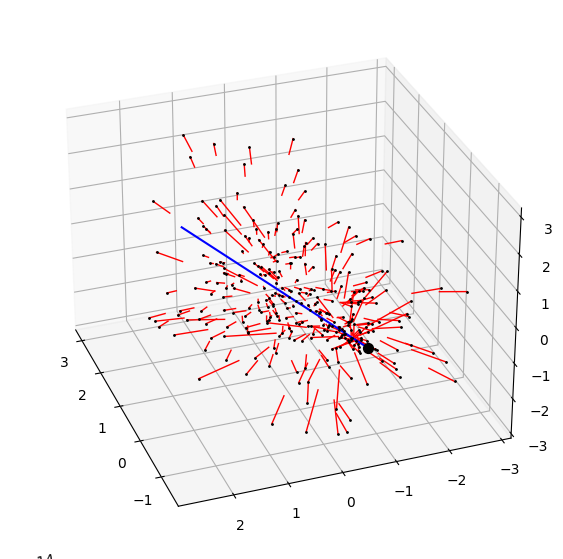

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')
for s in stones:
    ax.scatter([s.p1[0]], [s.p1[1]], [s.p1[2]], c="k", s=1)
    ax.plot([s.p1[0], s.p2[0]], [s.p1[1], s.p2[1]], [s.p1[2], s.p2[2]], c="r", linewidth=1)
pr2 = pr + vr*1.5e12
ax.scatter([pr[0]], [pr[1]], [pr[2]], c="k", s=50)
ax.plot([pr[0], pr2[0]], [pr[1], pr2[1]], [pr[2], pr2[2]], c="b")
ax.view_init(azim=160, elev=30)
plt.show()